In [1]:
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import datetime 
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams 
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os
import xgboost as xgb
import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from pandas import read_hdf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# LogisticRegression

In [5]:
#imporing the features file
df_final_train = read_hdf('Features.h5', 'train_df',mode='r')
df_final_test = read_hdf('Features.h5', 'test_df',mode='r')

In [6]:
y_train = df_final_train.indice
y_test = df_final_test.indice
df_final_train.drop(['drug', 'protein','indice'],axis=1,inplace=True)
df_final_test.drop(['drug', 'protein','indice'],axis=1,inplace=True)

Estimators =  50 Train Score 0.9999177834415851 test Score 0.8302934179222838
Estimators =  100 Train Score 0.9999177834415851 test Score 0.8302934179222838
Estimators =  250 Train Score 0.9999177834415851 test Score 0.8302934179222838
Estimators =  450 Train Score 0.9999177834415851 test Score 0.8302934179222838
Estimators =  500 Train Score 0.9999177834415851 test Score 0.8302934179222838


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

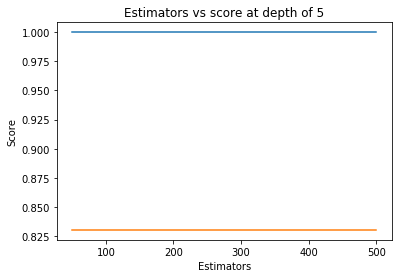

In [7]:
estimators = [50,100,250,450,500]
train_scores = []
test_scores = []
for i in estimators:
    logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                class_weight=None, random_state=None, solver='lbfgs',
                                max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    logreg.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,logreg.predict(df_final_train))
    test_sc = f1_score(y_test,logreg.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [8]:
 #LogisticRegressio implementation
logreg =  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                class_weight=None, random_state=None, solver='lbfgs',
                                max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logreg.fit(df_final_train,y_train)
y_train_pred = logreg.predict(df_final_train)
y_test_pred = logreg.predict(df_final_test)


In [9]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    annot_kws = {"ha": 'left',"va": 'top', "size":15}
    cmap=sns.light_palette('m')
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f",annot_kws=annot_kws, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted values')
    plt.ylabel('Original values')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", annot_kws=annot_kws, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted values')
    plt.ylabel('Original values')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", annot_kws=annot_kws, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted values')
    plt.ylabel('Original values')
    plt.title("Recall matrix")
    
    plt.show()

In [10]:
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  6028
False Positives:  0
False Negatives:  1
True Positives:  6081


In [11]:
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1554
False Positives:  0
False Negatives:  428
True Positives:  1047


In [12]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy :", format(Accuracy), "%")

Accuracy : 85.86992406734896 %


Test confusion_matrix


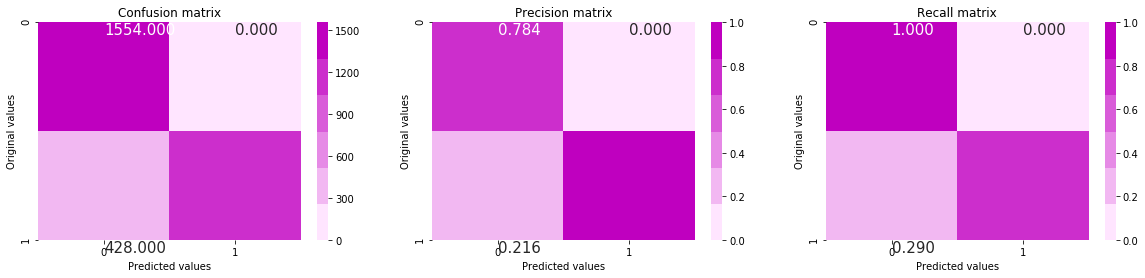

In [13]:
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [14]:
#predicting the train and test results
#FA score
logreg.fit(df_final_train,y_train)
y_train_pred = logreg.predict(df_final_train)
y_test_pred = logreg.predict(df_final_test)
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9999177834415851
Test f1 score 0.8302934179222838


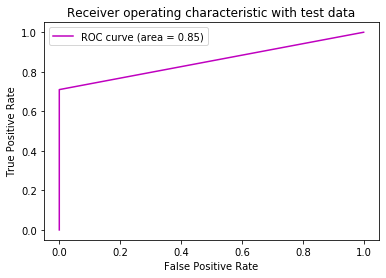

In [15]:
#ROC curve
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='m',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

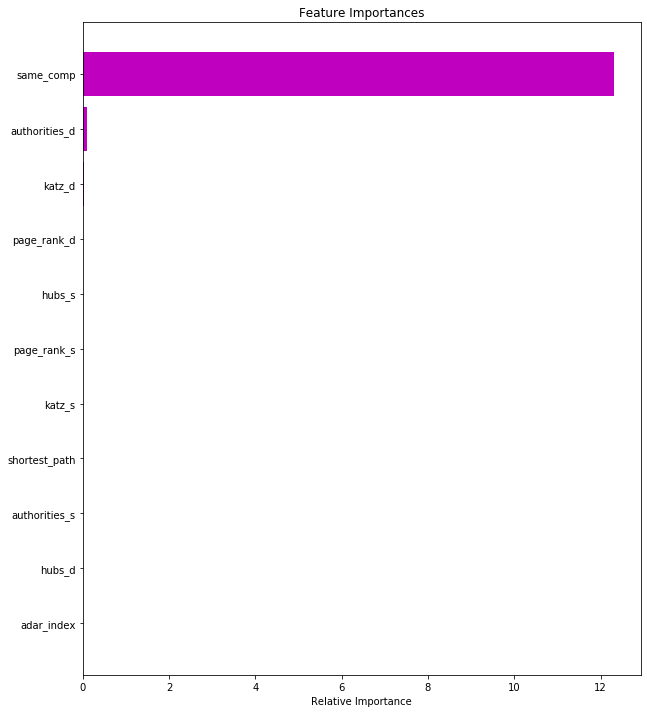

In [16]:
features = df_final_test.columns
importances =abs( logreg.coef_[0])
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

